In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
import re
import string
import copy
from textblob import TextBlob
from nltk import ngrams
from collections import Counter



In [3]:
df_fake=pd.read_csv("fake.csv")
df_true=pd.read_csv("true.csv")

In [4]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [5]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [6]:
print(df_true.isnull().values.any())
print(df_fake.isnull().values.any())



False
False


In [7]:
df_fake["class"]=0
df_true["class"]=1

In [8]:
df_fake.shape,df_true.shape

((23481, 5), (21417, 5))

In [9]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape,df_true.shape


((23471, 5), (21407, 5))

In [11]:
df_fake['Label'] = 'Fake'
df_true['Label'] = 'True'

In [12]:
df_merge=pd.concat([df_fake,df_true],axis=0)
df_merge.head(30)

,title,text,subject,date,class,Label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,Fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,Fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,Fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,Fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,Fake
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0,Fake
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0,Fake
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0,Fake
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0,Fake
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0,Fake


In [13]:
df=df_merge.drop(["title","subject","date"],axis=1)
df.head(20)

,text,class,Label
0,Donald Trump just couldn t wish all Americans ...,0,Fake
1,House Intelligence Committee Chairman Devin Nu...,0,Fake
2,"On Friday, it was revealed that former Milwauk...",0,Fake
3,"On Christmas day, Donald Trump announced that ...",0,Fake
4,Pope Francis used his annual Christmas Day mes...,0,Fake
5,The number of cases of cops brutalizing and ki...,0,Fake
6,Donald Trump spent a good portion of his day a...,0,Fake
7,In the wake of yet another court decision that...,0,Fake
8,Many people have raised the alarm regarding th...,0,Fake
9,Just when you might have thought we d get a br...,0,Fake


In [14]:
df=df.sample(frac=1)

In [15]:
df.head(10)

,text,class,Label
3072,WASHINGTON (Reuters) - U.S. President Donald T...,1,True
16830,Hillary was too busy to be bothered with makin...,0,Fake
4738,Billionaire Mark Cuban had previously been roo...,0,Fake
19831,WASHINGTON (Reuters) - The United States is co...,1,True
19449,"ANKARA (Reuters) - Turkey, Iran and Iraq have ...",1,True
12074,UNITED NATIONS (Reuters) - The United Nations ...,1,True
13445,GENEVA (Reuters) - The United Nations called o...,1,True
13190,"If you believe this excuse, you ll believe any...",0,Fake
19466,NEW DELHI (Reuters) - India is considering sup...,1,True
17115,BRUSSELS (Reuters) - Toxic fumes from kitchen ...,1,True


In [16]:
df.isnull().sum()

text     0
class    0
Label    0
dtype: int64

In [17]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [18]:
df["text"] = df["text"].apply(wordopt)

In [19]:
df.head(10)

,text,class,Label
3072,washington reuters u s president donald t...,1,True
16830,hillary was too busy to be bothered with makin...,0,Fake
4738,billionaire mark cuban had previously been roo...,0,Fake
19831,washington reuters the united states is co...,1,True
19449,ankara reuters turkey iran and iraq have ...,1,True
12074,united nations reuters the united nations ...,1,True
13445,geneva reuters the united nations called o...,1,True
13190,if you believe this excuse you ll believe any...,0,Fake
19466,new delhi reuters india is considering sup...,1,True
17115,brussels reuters toxic fumes from kitchen ...,1,True


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44878 entries, 3072 to 16209
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44878 non-null  object
 1   class   44878 non-null  int64 
 2   Label   44878 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [21]:


# Combine all text data into a single string
true_text = ' '.join(df_true['text'])


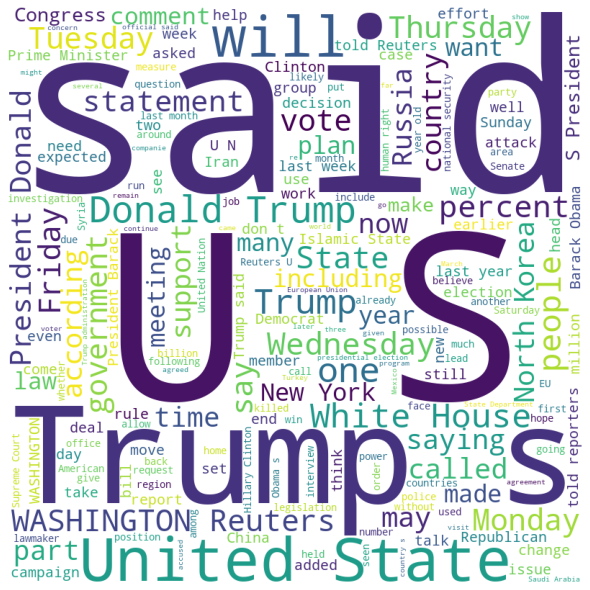

In [22]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(true_text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [23]:
fake_text = ' '.join(df_fake['text'])

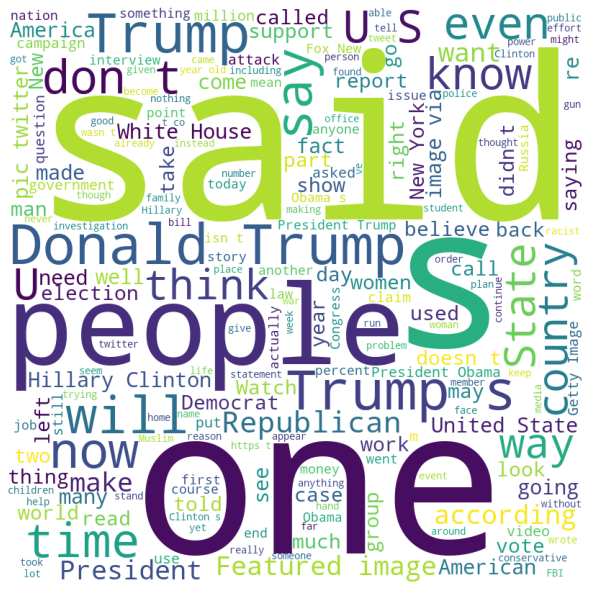

In [24]:
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(fake_text)

# Display the WordCloud image using matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:

df_true['word_count'] = df_true['text'].apply(lambda x: len(x.split()))


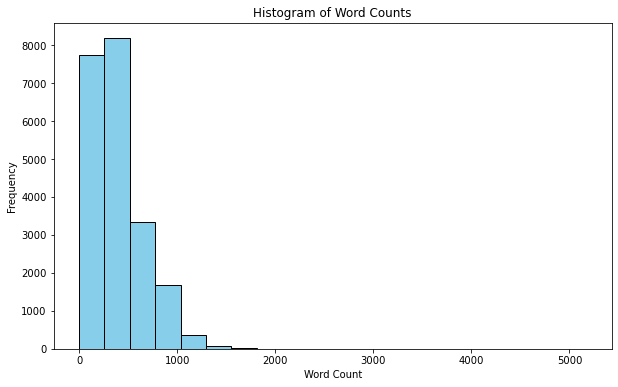

In [26]:

plt.figure(figsize=(10, 6))
plt.hist(df_true['word_count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts')
plt.show()


In [27]:
# Calculate word counts for each article
df_fake['word_count'] = df_fake['text'].apply(lambda x: len(x.split()))


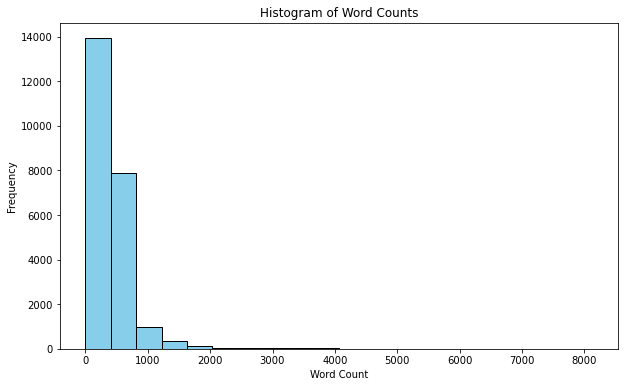

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df_fake['word_count'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts')
plt.show()

In [29]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
df_true['sentence_lengths'] = df_true['text'].apply(lambda x: [len(sent.split()) for sent in sent_tokenize(x)])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koushik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


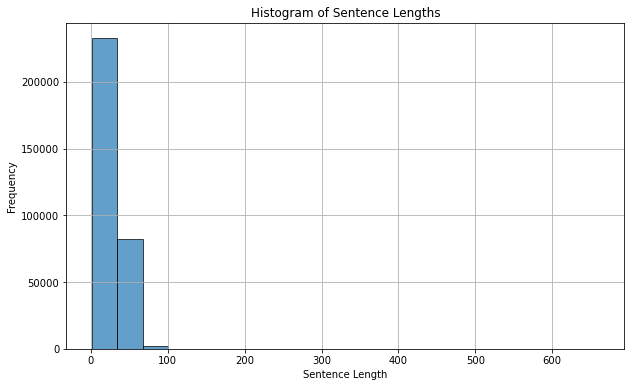

In [30]:
plt.figure(figsize=(10, 6))
all_sentence_lengths = [length for lengths in df_true['sentence_lengths'] for length in lengths]
plt.hist(all_sentence_lengths, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.grid(True)
plt.show()


In [31]:
df_fake['sentence_lengths'] = df_fake['text'].apply(lambda x: [len(sent.split()) for sent in sent_tokenize(x)])


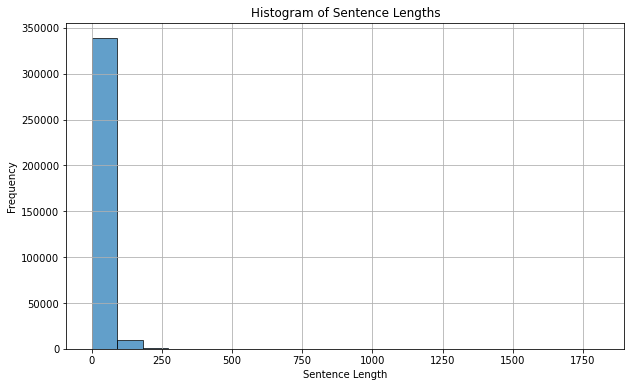

In [32]:
plt.figure(figsize=(10, 6))

# Flatten the list of sentence lengths
all_sentence_lengths = [length for lengths in df_fake['sentence_lengths'] for length in lengths]

# Plot the histogram
plt.hist(all_sentence_lengths, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sentence Lengths')
plt.grid(True)
plt.show()


In [33]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [34]:
plt.figure(figsize=(8, 6))

# Create a box plot
sns.boxplot(data=df, x=df['text'], y=df['sentiment'])
plt.xlabel('News Category')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Scores Comparison: True vs. Fake News')

# Alternatively, you can create a violin plot for a more detailed view
# sns.violinplot(data=data, x='category', y='sentiment')

plt.grid(True)
plt.show()


C:\Users\koushik\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 12484 missing from current font.
  font.set_text(s, 0.0, flags=flags)


KeyboardInterrupt: 

In [35]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [36]:
correlation_matrix=df[['word_count','sentiment']].corr()

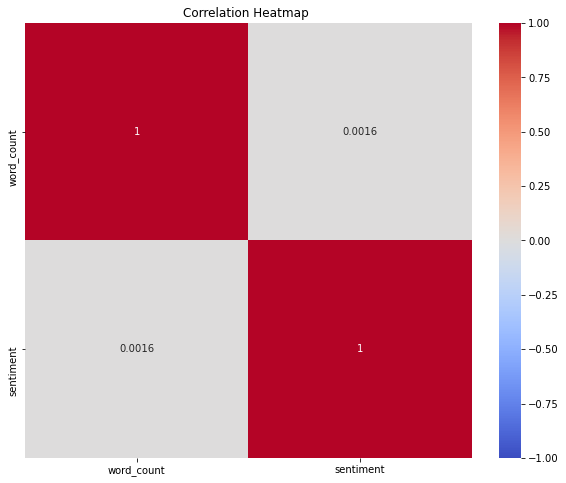

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap ')
plt.show()


In [38]:
df.head()

,text,class,Label,sentiment,word_count
3072,washington reuters u s president donald t...,1,True,0.000000,95
16830,hillary was too busy to be bothered with makin...,0,Fake,0.081293,708
4738,billionaire mark cuban had previously been roo...,0,Fake,0.082013,345
19831,washington reuters the united states is co...,1,True,0.086772,193
19449,ankara reuters turkey iran and iraq have ...,1,True,-0.001874,331


In [39]:
def calculate_ngram_frequencies(texts, n, top_n=10):
    all_ngrams = []
    
    for text in texts:
        words = text.split()
        ngram_list = list(ngrams(words, n))
        all_ngrams.extend(ngram_list)
    
    ngram_counter = Counter(all_ngrams)
    return ngram_counter.most_common(top_n)


In [40]:
n = 2  
top_n = 10  
true_texts = df[df['Label'] == 'True']['text']
fake_texts = df[df['Label'] == 'Fake']['text']
true_ngrams = calculate_ngram_frequencies(true_texts, n, top_n)
fake_ngrams = calculate_ngram_frequencies(fake_texts, n, top_n)


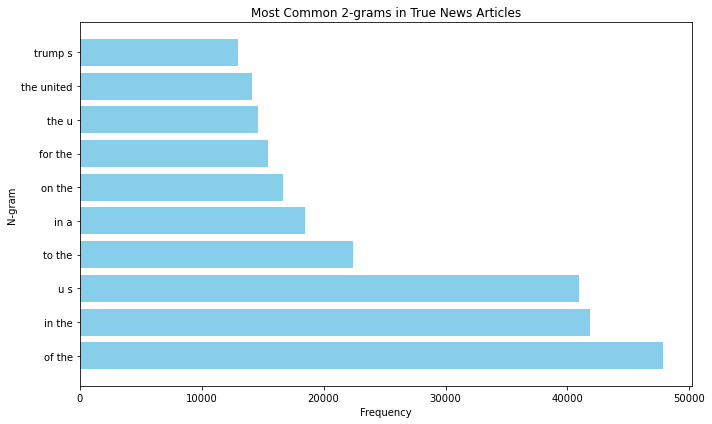

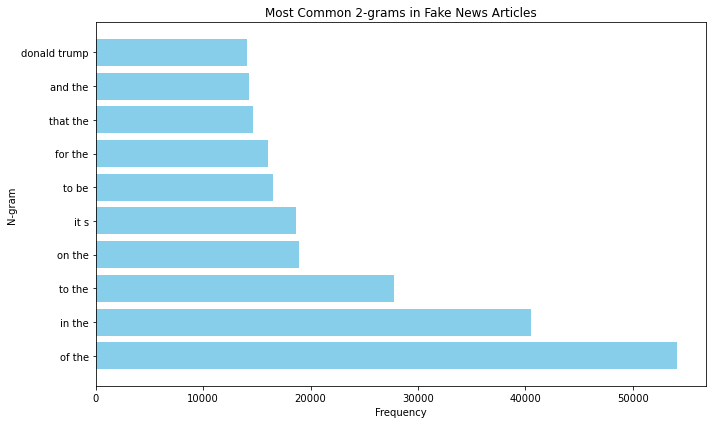

In [41]:
def plot_ngram_frequencies(ngram_list, category):
    ngram_strings = [' '.join(ngram) for ngram, count in ngram_list]
    counts = [count for ngram, count in ngram_list]
    
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_strings, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title(f'Most Common {n}-grams in {category} News Articles')
    plt.tight_layout()
    plt.show()

plot_ngram_frequencies(true_ngrams, 'True')
plot_ngram_frequencies(fake_ngrams, 'Fake')


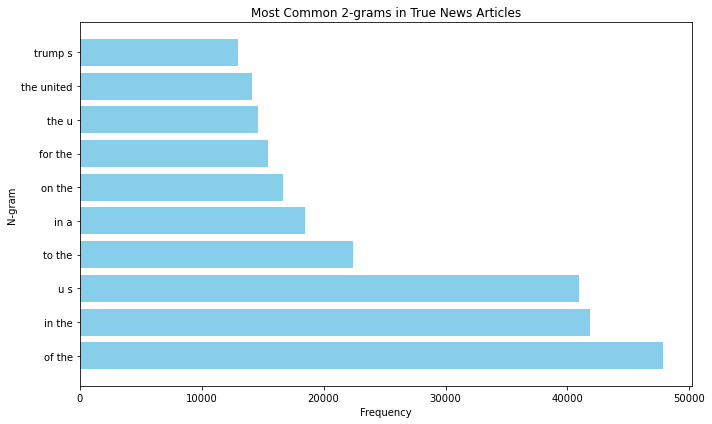

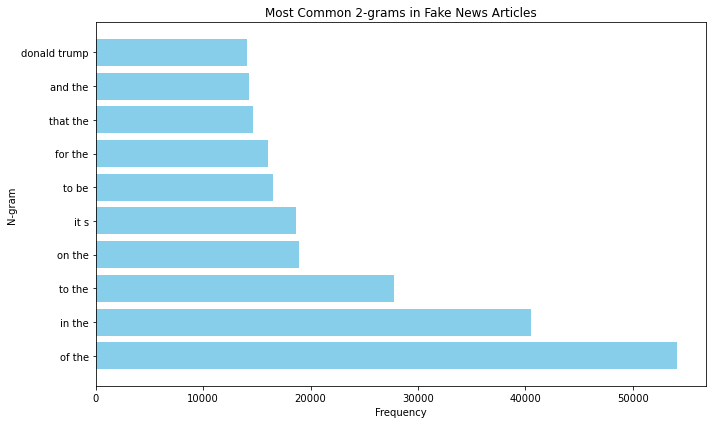

In [42]:
def calculate_ngram_frequencies(texts, n, top_n=10):
    all_ngrams = []
    
    for text in texts:
        words = text.split()
        ngram_list = list(ngrams(words, n))
        all_ngrams.extend(ngram_list)
    
    ngram_counter = Counter(all_ngrams)
    return ngram_counter.most_common(top_n)


n = 2  
top_n = 10 

true_texts = df[df['Label'] == 'True']['text']
fake_texts = df[df['Label'] == 'Fake']['text']

true_ngrams = calculate_ngram_frequencies(true_texts, n, top_n)
fake_ngrams = calculate_ngram_frequencies(fake_texts, n, top_n)


def plot_ngram_frequencies(ngram_list, category):
    ngram_strings = [' '.join(ngram) for ngram, count in ngram_list]
    counts = [count for ngram, count in ngram_list]
    
    plt.figure(figsize=(10, 6))
    plt.barh(ngram_strings, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.title(f'Most Common {n}-grams in {category} News Articles')
    plt.tight_layout()
    plt.show()

plot_ngram_frequencies(true_ngrams, 'True')
plot_ngram_frequencies(fake_ngrams, 'Fake')


In [43]:
x=df["text"]
y=df["class"]


In [44]:
def bar_chart(feature):
    global df
    df1 = copy.deepcopy(df)
    
    

    
    
    poisonous = df1[df1['class'] == 0][feature].value_counts()
    edible = df1[df1['class'] == 1][feature].value_counts()
    dff = pd.DataFrame([poisonous, edible])
    dff.index = [0, 1]
    ax = dff.plot(kind='bar', stacked=True, figsize=(10, 5))
    ax.set_title(feature)  

In [45]:
def pie_chart(feature):
    global df
    df1 = copy.deepcopy(df)
    poisonous = df1[df1['class'] == 0][feature].value_counts()
    edible = df1[df1['class'] == 1][feature].value_counts()
    dff = pd.DataFrame([poisonous, edible])
    dff.index = [0, 1]
    ax = dff.T.plot(kind='pie', subplots=True, figsize=(10, 5))
    ax[0].set_title(feature)

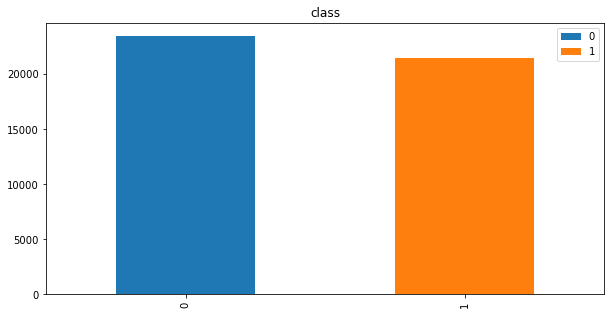

In [46]:
bar_chart('class')

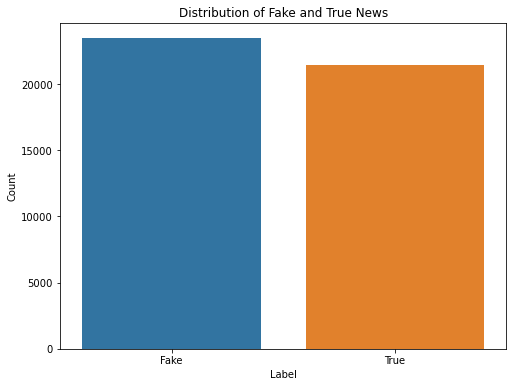

No handles with labels found to put in legend.


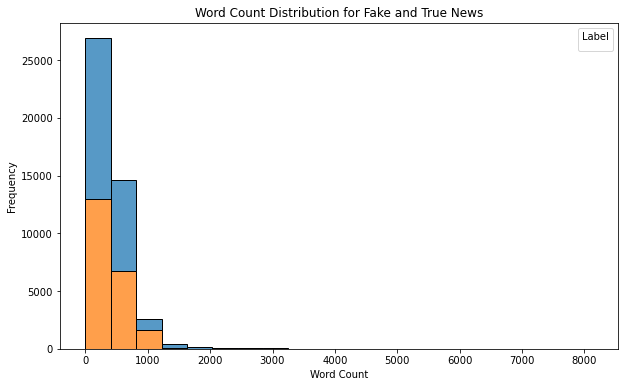

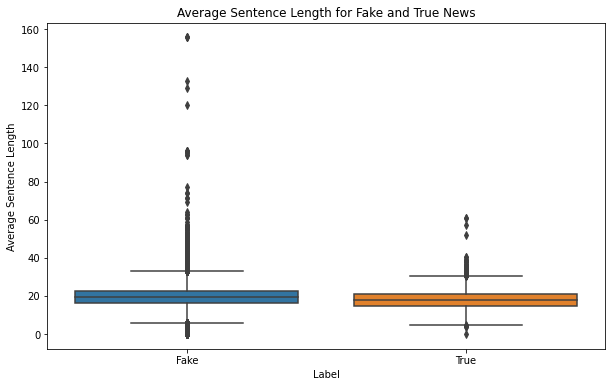

In [47]:



plt.figure(figsize=(8, 6))
sns.countplot(x='Label', data=df_merge)
plt.title('Distribution of Fake and True News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# Visualize word count distribution for fake and true news
df_merge['word_count'] = df_merge['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data=df_merge, x='word_count', hue='Label', multiple='stack', bins=20)
plt.title('Word Count Distribution for Fake and True News')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='Label')
plt.show()

# Visualize the average length of sentences for fake and true news
df_merge['avg_sentence_length'] = df_merge['text'].apply(lambda x: len(x.split()) / len(x.split('.')))
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='avg_sentence_length', data=df_merge)
plt.title('Average Sentence Length for Fake and True News')
plt.xlabel('Label')
plt.ylabel('Average Sentence Length')
plt.show()


In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [49]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [53]:
pred_lr=LR.predict(xv_test)

In [54]:
LR.score(xv_test,y_test)

0.9852941176470589

In [55]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4673
           1       0.98      0.99      0.98      4303

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [56]:
from sklearn.metrics import accuracy_score

In [57]:
acc = accuracy_score(y_test,pred_lr)

In [58]:
acc 


0.9852941176470589

In [59]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(xv_train,y_train)


DecisionTreeClassifier()

In [60]:
DT.score(xv_test,y_test)


0.9965463458110517

In [61]:
pred_DT=DT.predict(xv_test)

In [62]:
print(classification_report(y_test,pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4673
           1       1.00      1.00      1.00      4303

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
GBC=GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train,y_train)

GradientBoostingClassifier(random_state=0)

In [65]:
GBC.score(xv_test,y_test)

0.9950980392156863

In [66]:
pred_GBC=GBC.predict(xv_test)


In [67]:
print(classification_report(y_test,pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4673
           1       0.99      1.00      0.99      4303

    accuracy                           1.00      8976
   macro avg       1.00      1.00      1.00      8976
weighted avg       1.00      1.00      1.00      8976



In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
RFC=RandomForestClassifier(random_state=0)
RFC.fit(xv_train,y_train)

RandomForestClassifier(random_state=0)

In [70]:
RFC.score(xv_test,y_test)

0.9893048128342246

In [71]:
pred_RFC=RFC.predict(xv_test)

In [72]:
print(classification_report(y_test,pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4673
           1       0.99      0.99      0.99      4303

    accuracy                           0.99      8976
   macro avg       0.99      0.99      0.99      8976
weighted avg       0.99      0.99      0.99      8976



In [73]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(xv_train,y_train)
pred_KNN = knn.predict(xv_test)
accuracy = accuracy_score(y_test,pred_KNN)
print("Accuracy:", float(100*accuracy),"%")

cm = confusion_matrix(y_test,pred_KNN)
precision = precision_score(y_test,pred_KNN)
recall = recall_score(y_test, pred_KNN)
f1 = f1_score(y_test,pred_KNN)
print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 69.30704099821747 %
Confusion Matrix:
[[4547  126]
 [2629 1674]]
Precision: 0.93
Recall: 0.3890309086683709
F1 Score: 0.548582664263477


C:\Users\koushik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [74]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(xv_train,y_train)
pred_SVC = svm.predict(xv_test)
accuracy = accuracy_score(y_test, pred_SVC)
print("Accuracy:", float(100*accuracy),"%")

cm = confusion_matrix(y_test,pred_SVC)
precision = precision_score(y_test,pred_SVC)
recall = recall_score(y_test,pred_SVC)
f1 = f1_score(y_test,pred_SVC)
print("Confusion Matrix:")
print(cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 99.29812834224599 %
Confusion Matrix:
[[4629   44]
 [  19 4284]]
Precision: 0.9898336414048059
Recall: 0.9955844759470137
F1 Score: 0.9927007299270073


In [76]:
print("Accuracy of Linear Regression:", accuracy_score(y_test,pred_lr))
print("Accuracy of Decision Tree:", accuracy_score(y_test,pred_DT))
print("Accuracy of Random Forest:", accuracy_score(y_test,pred_RFC))
print("Accuracy of KNN:", accuracy_score(y_test,pred_KNN))
print("Accuracy of SVC:", accuracy_score(y_test,pred_SVC))

Accuracy of Linear Regression: 0.9852941176470589
Accuracy of Decision Tree: 0.9965463458110517
Accuracy of Random Forest: 0.9893048128342246
Accuracy of KNN: 0.6930704099821747
Accuracy of SVC: 0.99298128342246
